<a href="https://colab.research.google.com/github/ankita-sen09/sentiment-analysis/blob/main/sentimentanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


(173577, 40)
(173577, 40)


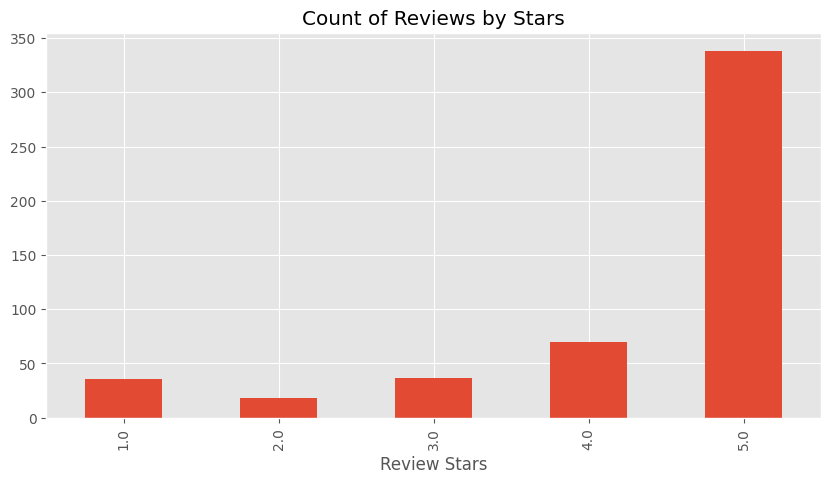

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
plt.style.use('ggplot')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

# Handle file reading errors and provide feedback
try:
    df = pd.read_csv('/content/Reviews.csv', encoding='utf-8', engine='python', on_bad_lines='skip')
    df.head()
except pd.errors.ParserError as e:
    print(f"An error occurred while reading the file: {e}")
except FileNotFoundError:
    print("The specified file was not found.")
else:  # Execute the following code only if no exceptions occurred
    df['Text'].values[0]
    print(df.shape)
    df.head(500)
    print(df.shape)
    ax=df['Score'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Stars',figsize=(10,5))
    ax.set_xlabel('Review Stars')
    plt.show()
    example=df['Text'][50]
    print(example)
    tokens=nltk.word_tokenize(example)
    tokens[0:10]





In [27]:
tokens=nltk.word_tokenize(example)
tokens[0:10]
tagged=nltk.pos_tag(tokens)
tagged[:10]
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia= SentimentIntensityAnalyzer()
sia.polarity_scores('I loved it so much!')
sia.polarity_scores('This is bad')

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

In [31]:
sample_size = 5
df_sample = df.sample(n=sample_size, random_state=42)
res={}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text=row['Text']
  myid=row['ProductId']
  if isinstance(text, str):
    res[myid]=sia.polarity_scores(text)
  else:
    print(f"Warning: Skipping row {i} due to missing or invalid 'Text' value.")

  0%|          | 0/173577 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.


In [32]:
vaders=pd.DataFrame(res).T

In [33]:
vaders=vaders.reset_index().rename(columns={'index':'ProductId'})
vaders=vaders.merge(df,how='left', on='ProductId')
vaders.head()

,ProductId,neg,neu,pos,compound,1,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,B001E4KFG0,0.000,0.695,0.305,0.9441,1.0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B00813GRG4,0.138,0.862,0.000,-0.5664,2.0,A1D87F6ZCVE5NK,dll pa,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B000LQOCH0,0.091,0.754,0.155,0.8265,3.0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B000UA0QIQ,0.000,1.000,0.000,0.0000,4.0,A395BORC6FGVXV,Karl,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B006K2ZZ7K,0.000,0.520,0.480,0.9487,5.0,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


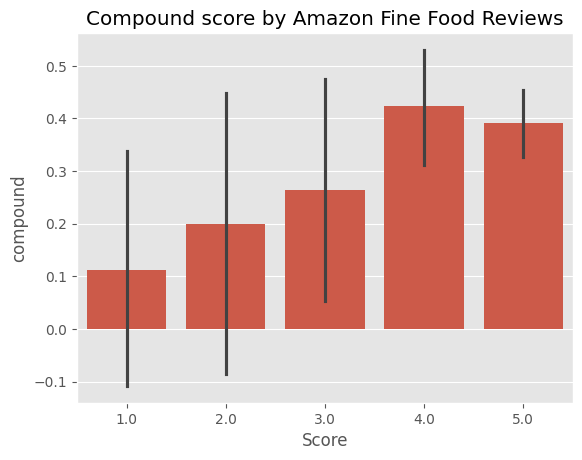

In [34]:
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('Compound score by Amazon Fine Food Reviews')
plt.show()

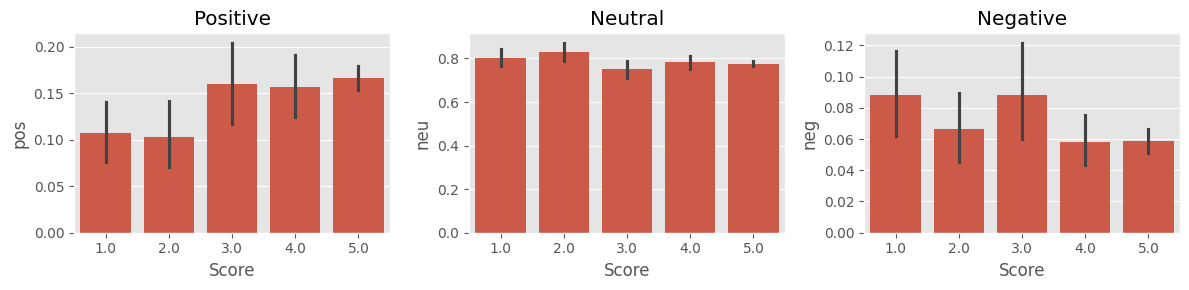

In [35]:
fig, axs= plt.subplots(1,3, figsize=(12,3))
sns.barplot(data=vaders,x='Score',y='pos', ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu', ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()


In [37]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [38]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687465, 'roberta_pos': 0.0029573692}


In [39]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt', truncation=True, padding='max_length', max_length=512)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [46]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['ProductId']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid]=both
        # ... (What happens with the 'both' dictionary?)

    except Exception as e:
        print(f"Error processing row {i}: {e}")  # Print the full error message

  0%|          | 0/173577 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
Error processing row 168577: 'float' object has no attribute 'encode'
Error processing row 168578: 'float' object has no attribute 'encode'
Error processing row 168579: 'float' object has no attribute 'encode'
Error processing row 168580: 'float' object has no attribute 'encode'
Error processing row 168581: 'float' object has no attribute 'encode'
Error processing row 168582: 'float' object has no attribute 'encode'
Error processing row 168583: 'float' object has no attribute 'encode'
Error processing row 168584: 'float' object has no attribute 'encode'
Error processing row 168585: 'float' object has no attribute 'encode'
Error processing row 168586: 'float' object has no attribute 'encode'
Error processing row 168587: 'float' object has no attribute 'encode'
Error processing row 168588: 'float' object has no attribute 'encode'
Error processing row 168589: 'float' object has no attribute 'encode'
Error processing row 168590: 'float' ob

In [47]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'ProductId'})
results_df = results_df.merge(df, how='left', on='ProductId')
results_df.columns

Index(['ProductId', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', '1', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39'],
      dtype='object')

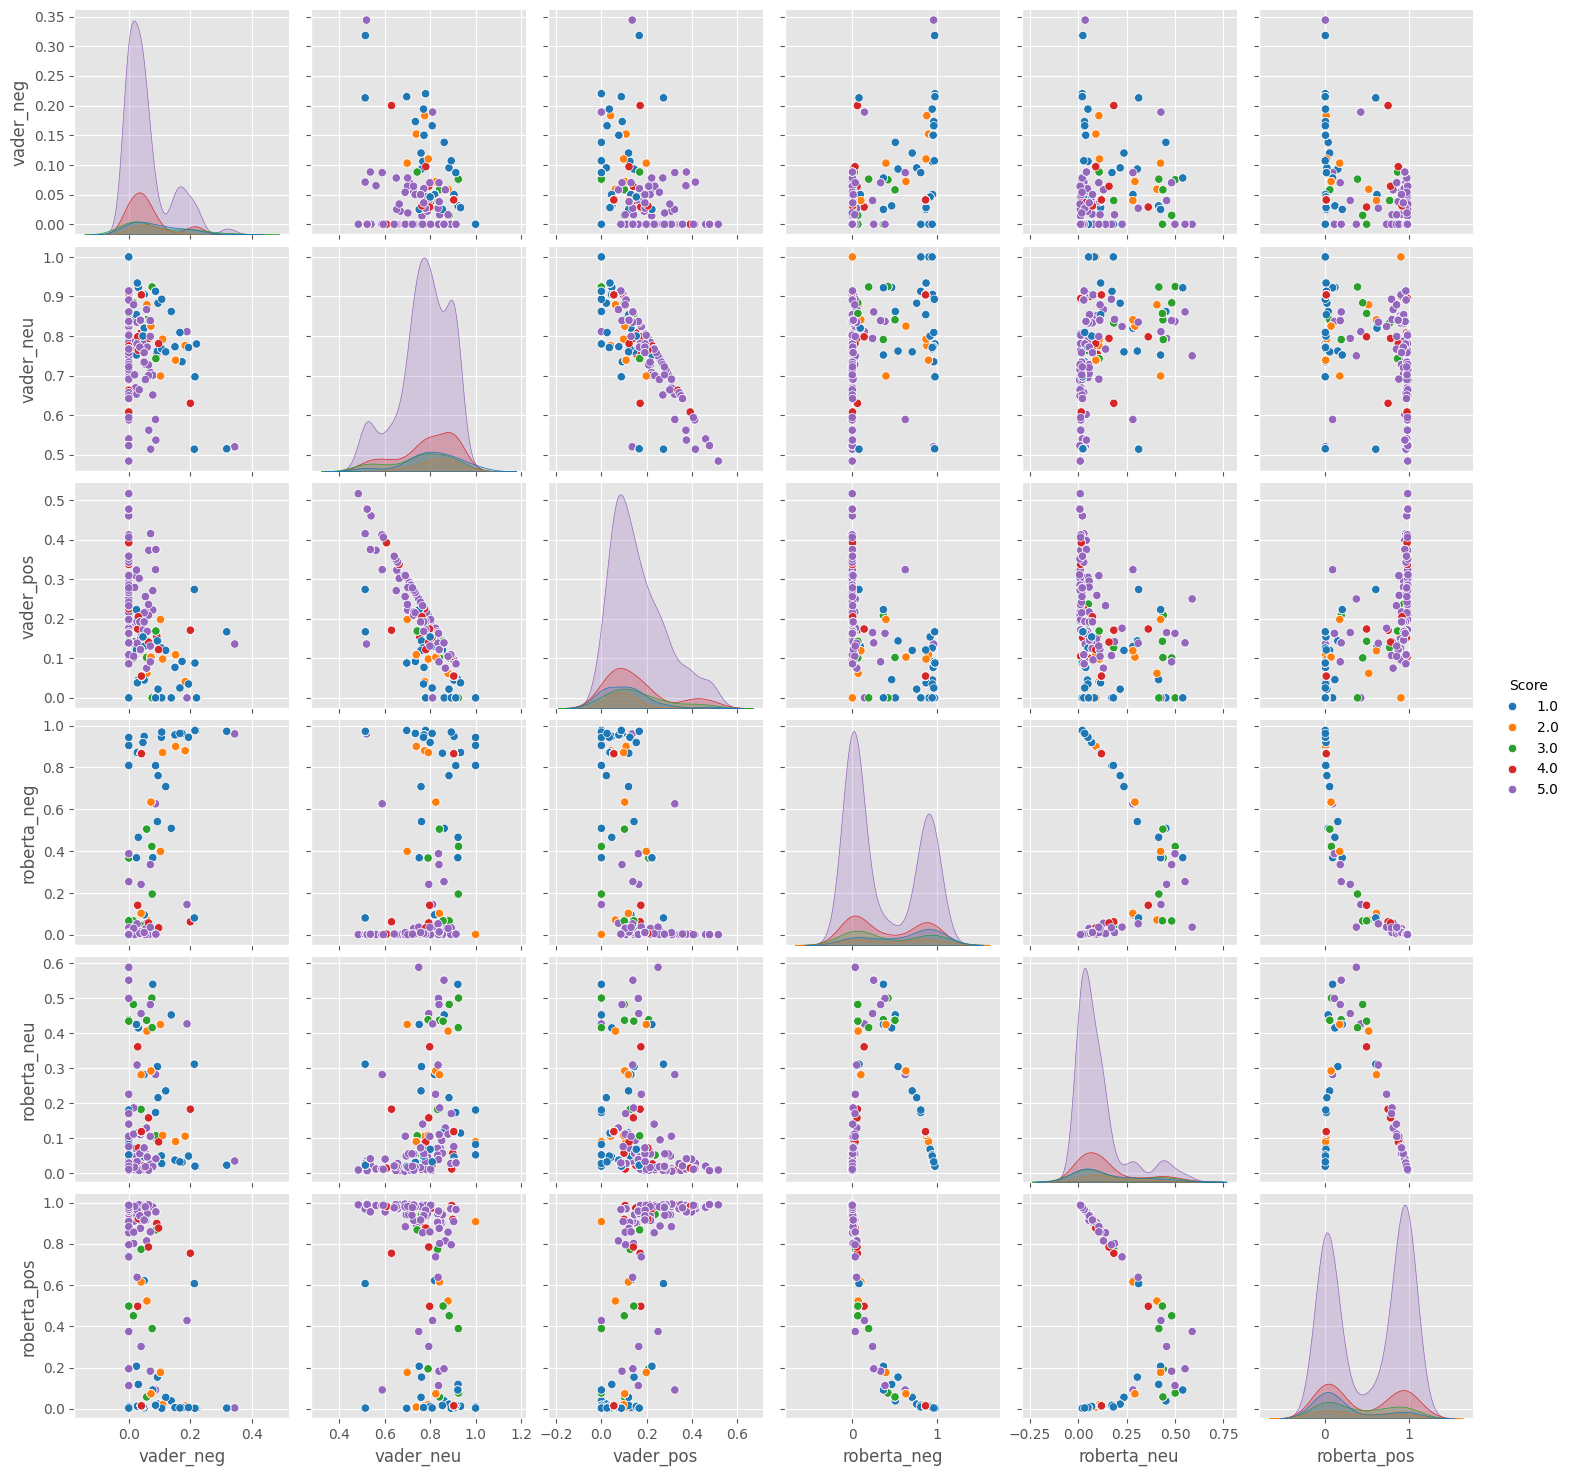

In [48]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [49]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]
results_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

"I used to buy this sugar for years. I do not eat much sugar, but still. This sugar is called turbinado sugar, but is misleading. I picked this brand just because it says real turbinado sugar, and other brands (in the local food store) that their sugar is brown because it is colored with caramel or something.<br /><br />HOW did i find out? I needed just a sweet water few days ago. I put this Sugar in The Raw in the glass. The water became brown and on the bottom of the glass i got just PURE WHITE SUGAR CRYSTALS!!!!! What a shame on the producer! U can try to put this sugar in your mouth and after few seconds you will spit out pure white crystals as well.<br /><br />I'm just wondering if the consumers can hold the company liable for such a practice."

In [50]:
results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]
results_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [51]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")
sent_pipeline('I love sentiment analysis!')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [52]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]